# LIST INTERMEDIATE  USING PYTHON
## Exploratory Data Analysis (EDA):
### * Conduct in-depth EDA on a dataset, including identifying and handling missing values, outliers, and data anomalies.
### * Create various visualizations like histograms, box plots, and heatmaps to understand the distribution and relationships within the data.

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load sample dataset
df = pd.read_csv('Details.csv')

# Display basic information about the dataset
print("Dataset Info:")
print(df.info())

# Display summary statistics
print("\nSummary Statistics:")
print(df.describe())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Order ID      1500 non-null   object
 1   Amount        1500 non-null   int64 
 2   Profit        1500 non-null   int64 
 3   Quantity      1500 non-null   int64 
 4   Category      1500 non-null   object
 5   Sub-Category  1500 non-null   object
 6   PaymentMode   1500 non-null   object
dtypes: int64(3), object(4)
memory usage: 82.2+ KB
None

Summary Statistics:
            Amount      Profit     Quantity
count  1500.000000  1500.00000  1500.000000
mean    291.847333    24.64200     3.743333
std     461.924620   168.55881     2.184942
min       4.000000 -1981.00000     1.000000
25%      47.750000   -12.00000     2.000000
50%     122.000000     8.00000     3.000000
75%     326.250000    38.00000     5.000000
max    5729.000000  1864.00000    14.000000


In [28]:
# Check for missing values
missing_values = df.isnull().sum()
print("\nMissing Values:")
print(missing_values)

# Remove rows with missing values
df_clean = df.dropna()

# Impute missing values (e.g., using mean, median, or mode)
# df['column_name'].fillna(df['column_name'].mean(), inplace=True)


Missing Values:
Order ID        0
Amount          0
Profit          0
Quantity        0
Category        0
Sub-Category    0
PaymentMode     0
dtype: int64


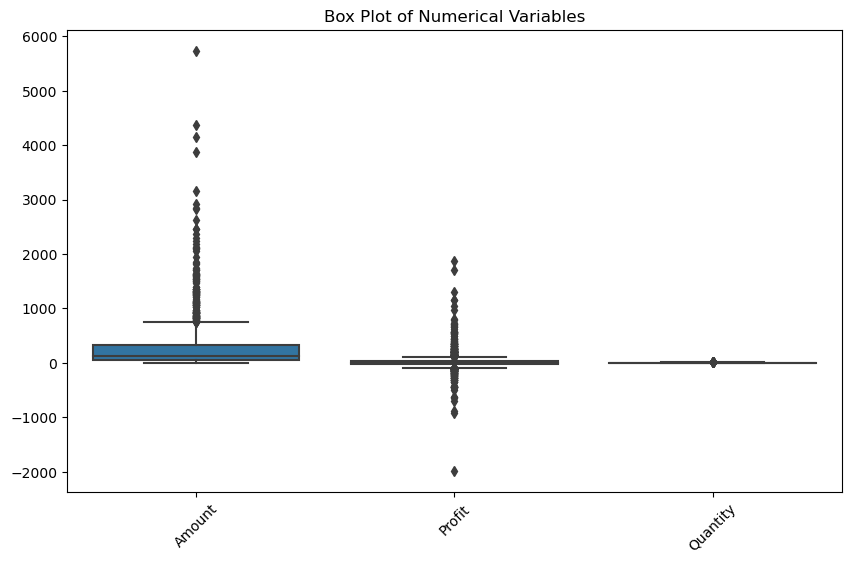

In [6]:
# Visualize box plots to identify outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.title("Box Plot of Numerical Variables")
plt.xticks(rotation=45)
plt.show()

# Handle outliers (e.g., winsorization, removing, or transforming)

<Figure size 1000x600 with 0 Axes>

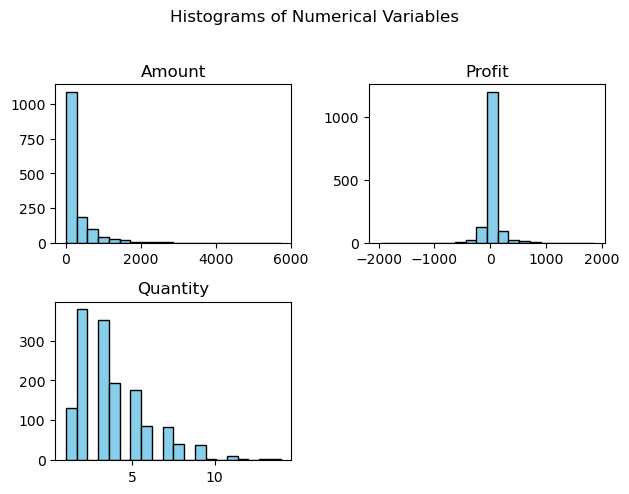

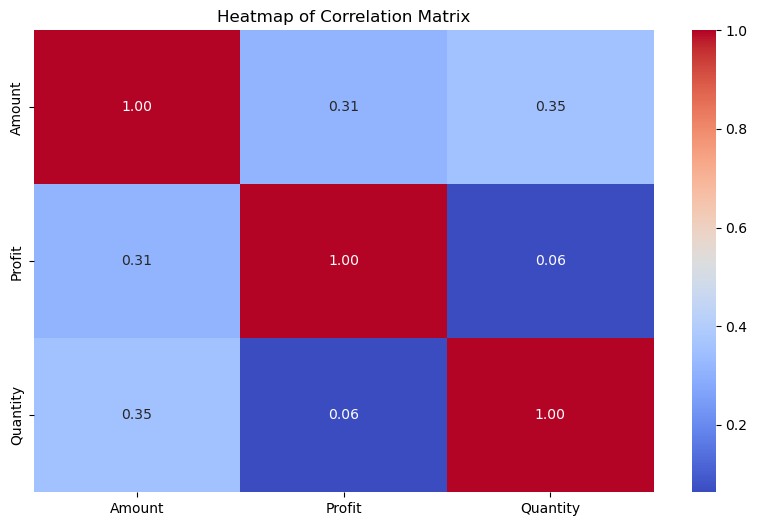

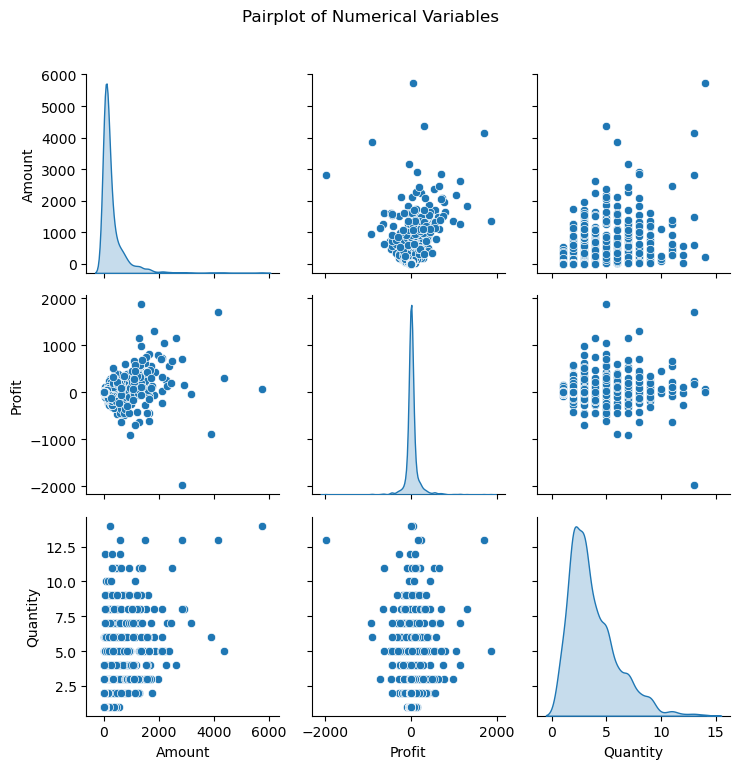

In [29]:
# Create histograms to visualize the distribution of numerical variables
plt.figure(figsize=(10, 6))
df.hist(bins=20, color='skyblue', edgecolor='black', grid=False)
plt.suptitle("Histograms of Numerical Variables", y=1.02)
plt.tight_layout()
plt.show()

# Create heatmaps to visualize correlations between variables
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap of Correlation Matrix")
plt.show()

# Create pairplots to visualize relationships between numerical variables
sns.pairplot(df, diag_kind='kde', markers='o', palette='husl')
plt.suptitle("Pairplot of Numerical Variables", y=1.02)
plt.tight_layout()
plt.show()

# Data Preprocessing:
## * Perform data cleaning tasks, such as standardizing column names, encoding categorical variables, and transforming numerical d ata.
## * Merge or join multiple datasets together based on common columns.

In [20]:
# Standardize column names (convert to lowercase and replace spaces with underscores)
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [31]:
# Perform one-hot encoding for categorical variables
df_encoded = pd.get_dummies(df, columns=['PaymentMode'])

In [32]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the numerical columns
df_encoded[['Profit', 'PaymentMode']] = scaler.fit_transform(df_encoded[['Profit', 'PaymentMode']])

KeyError: "['PaymentMode'] not in index"

# Time Series Analysis:
## * Analyze time series data, including trend and seasonality decomposition.
## * Forecast future values using time series forecasting methods.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA

# Sample time series data
# Replace this with your actual time series data
date_range = pd.date_range(start='2020-01-01', end='2024-12-31')
time_series_data = pd.Series(np.random.randn(len(date_range)), index=date_range)

# Visualize the time series data
plt.figure(figsize=(10, 5))
plt.plot(time_series_data)
plt.title('Time Series Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)
plt.show()

# Decompose the time series into trend, seasonal, and residual components
decomposition = seasonal_decompose(time_series_data, model='additive', period=12)  # Adjust period if needed
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Visualize the decomposed components
plt.figure(figsize=(10, 10))

plt.subplot(411)
plt.plot(time_series_data, label='Original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal, label='Seasonal')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual, label='Residual')
plt.legend(loc='best')

plt.tight_layout()

# Forecast future values using ARIMA model
# Example: ARIMA(1,1,1) model
model = ARIMA(time_series_data, order=(1, 1, 1))
result = model.fit()
forecast_steps = 12  # Number of steps ahead to forecast
forecast = result.forecast(steps=forecast_steps)

# Visualize the original data and forecasted values
plt.figure(figsize=(10, 5))
plt.plot(time_series_data, label='Original')
plt.plot(forecast, color='red', linestyle='--', label='Forecast')
plt.title('Time Series Forecasting with ARIMA')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend(loc='best')
plt.grid(True)
plt.show()
